## OVER VIEW
## This python script's objective is to find out the features which impact the property price in Melb House Market.
## The data contains Property suburb, address, Room number, Property type, Price, Sale Method, Sale Aggency, Sold Date,
## Distance to the city center , Postcode , Bedroom2 (Bedroom number extract from other sources),Bathroom number,Car park
## Number , Landsize,BuildingArea,YearBuilt,CouncilArea and Location (Longtitute&Latitute),Regionname and PropertyCount in
## each suburb

## 1.the analysis will start with examine the whole data set and data cleanning will be conducted accordingly
## 2.the correlation will be implented to gain the overview concept of numerical features with house price
## 3.the nonnumerical features impact on house price will be tested.

In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns',None)
# pd.set_option('display.max_rows',None)
# turn off scientific display
pd.set_option('display.float_format',lambda x : '%.2f' % x)
sns.set_theme(style='darkgrid')


In [2]:
# Read data
df = pd.read_csv('melb_data.csv')
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,2.00,1.00,1.00,202.00,nan,nan,Yarra,-37.80,145.00,Northern Metropolitan,4019.00
1,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,2.00,1.00,0.00,156.00,79.00,1900.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00
2,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,3.00,2.00,0.00,134.00,150.00,1900.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00
3,Abbotsford,40 Federation La,3,h,850000.00,PI,Biggin,4/03/2017,2.50,3067.00,3.00,2.00,1.00,94.00,nan,nan,Yarra,-37.80,145.00,Northern Metropolitan,4019.00
4,Abbotsford,55a Park St,4,h,1600000.00,VB,Nelson,4/06/2016,2.50,3067.00,3.00,1.00,2.00,120.00,142.00,2014.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.00,S,Barry,26/08/2017,16.70,3150.00,4.00,2.00,2.00,652.00,nan,1981.00,NaN,-37.91,145.17,South-Eastern Metropolitan,7392.00
13576,Williamstown,77 Merrett Dr,3,h,1031000.00,SP,Williams,26/08/2017,6.80,3016.00,3.00,2.00,2.00,333.00,133.00,1995.00,NaN,-37.86,144.88,Western Metropolitan,6380.00
13577,Williamstown,83 Power St,3,h,1170000.00,S,Raine,26/08/2017,6.80,3016.00,3.00,2.00,4.00,436.00,nan,1997.00,NaN,-37.85,144.89,Western Metropolitan,6380.00
13578,Williamstown,96 Verdon St,4,h,2500000.00,PI,Sweeney,26/08/2017,6.80,3016.00,4.00,1.00,5.00,866.00,157.00,1920.00,NaN,-37.86,144.89,Western Metropolitan,6380.00


### Data quality check (Null value, Datatype)

In [3]:
# df overview
df.info()
# sum up null number in df
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

C:\Users\87636\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


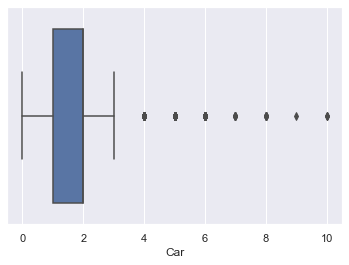

In [4]:
# fill car null
## check the car number distribution
sns.boxplot(df.Car)
plt.show()

In [5]:
## replace the Car null with median (median=2)
df['Car'] =df['Car'].fillna(df['Car'].median())

In [6]:
# check the type of property that building area = null
df[df['BuildingArea'].isnull()]['Type'].unique()

array(['h', 'u', 't'], dtype=object)

In [7]:
# transfer Col YearBuilt data type to int
df['YearBuilt'] = df['YearBuilt'].astype('Int64') # int64 can work with nan values , 'int'will throw an error about nan


## Check the prize distribution based on Property type

<Figure size 5760x3600 with 0 Axes>

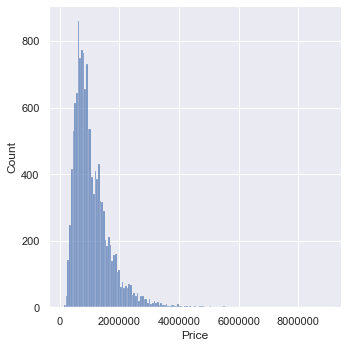

In [8]:
plt.figure(figsize=(80,50))
sns.displot(df.Price)
plt.ticklabel_format(style='plain') # shut down scientific counting method
plt.show() # 0-2000K

In [9]:
Price = df.groupby('Type').Price.describe().reset_index()

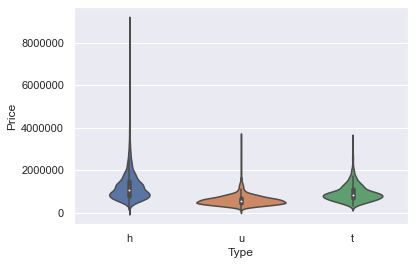

In [10]:
fig,ax = plt.subplots()
sns.violinplot(x='Type',y='Price',data=df)
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

## Output:main house price is between 792000-1500000, townhouse price is between 670000-1101900,unit price is between 440000-706000

## Check the numerical features corr based in different property type

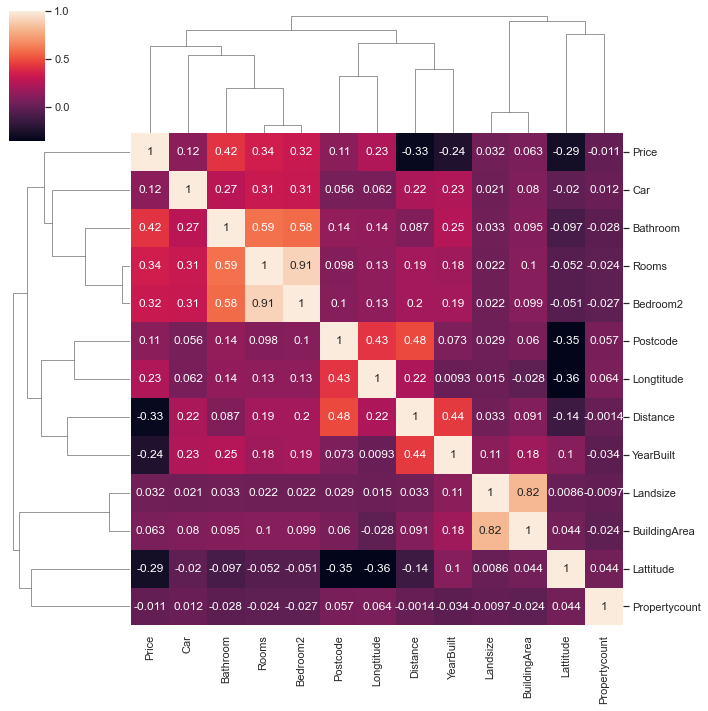

In [11]:
housecorrdf = df[df['Type']=='h']
sns.clustermap(pd.DataFrame.corr(housecorrdf),annot=True,fmt='.2g')
plt.show()

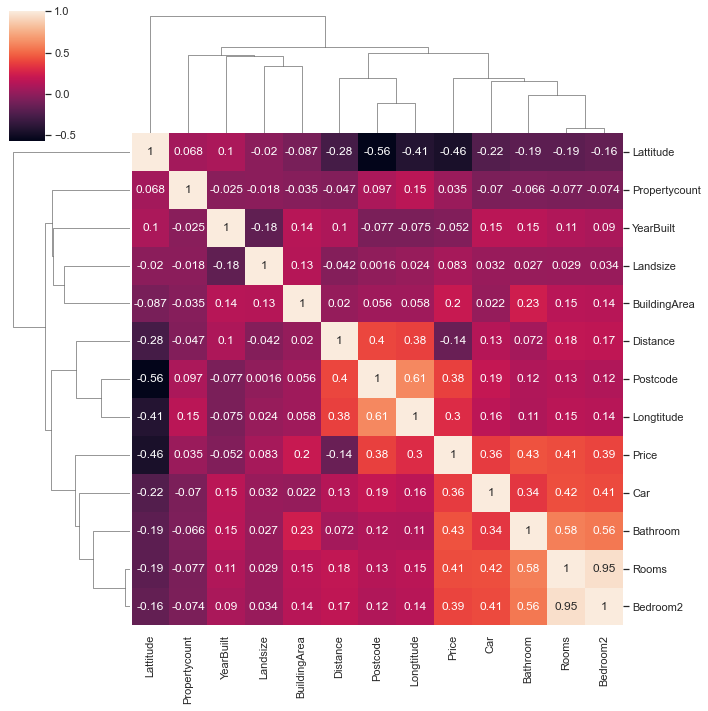

In [12]:
townhousecorrdf = df[df['Type']=='t']
sns.clustermap(pd.DataFrame.corr(townhousecorrdf),annot=True,fmt='.2g')
plt.show()

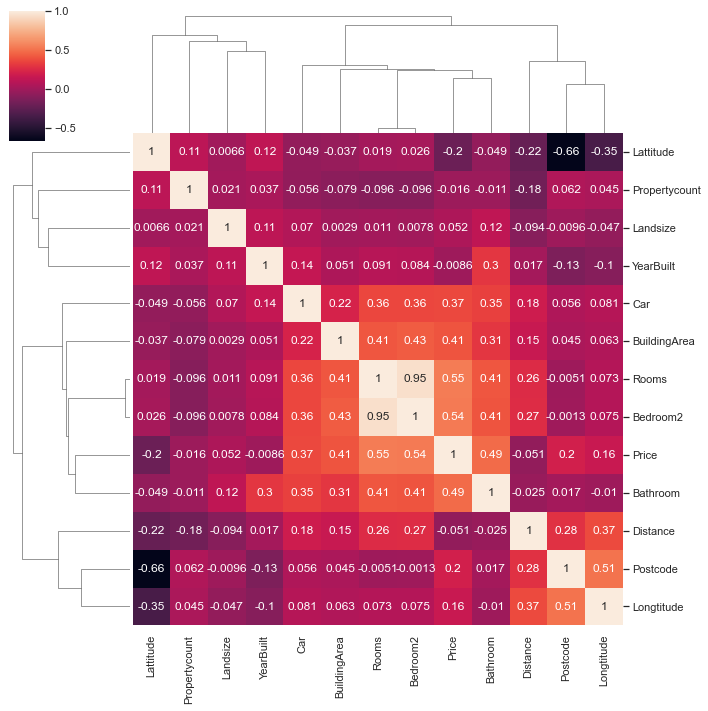

In [13]:
unitcorrdf = df[df['Type']=='u']
sns.clustermap(pd.DataFrame.corr(unitcorrdf),annot=True,fmt='.2g')
plt.show()

## Output:Feature Rooms and Bedroom2 have high corr with house price and Rooms and Bedroom2 has high corr too.

# (Categorical Feature) Does Property type impact the house price?
## What type of the properties do Mel real estate have ? Which one shares the biggest proportion?

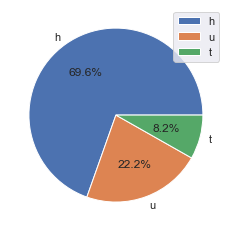

In [14]:
# Check the proportion in each type of sold property
plt.pie(df.Type.value_counts(),labels=df.Type.value_counts().index,autopct='%1.1f%%')
plt.legend()
plt.show()

## Output: House owns the biggeest market which is 69.6% followed by units 22.2% and townhouse 8.2%

## How property type impact house prize ?

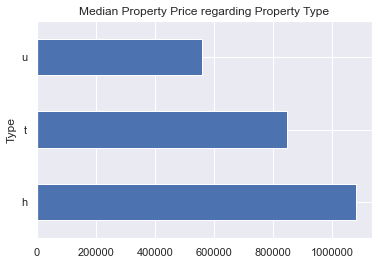

In [15]:
# Discover the property average price regarding property type
ax=plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
df.groupby('Type').Price.agg('median').plot.barh()
plt.title('Median Property Price regarding Property Type')
plt.show()

## Output :According to the calculation of the mean price of each type of propreties, house is the most pricy one and unit is the cheapest one.

# Will Region Impact the house price?

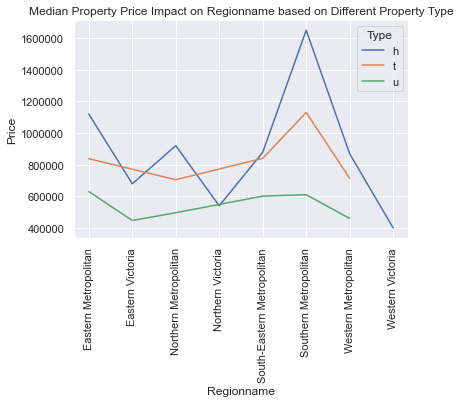

In [16]:
# Region with price
# Median price of each region
fig,ax = plt.subplots()
Region = df.groupby(['Regionname','Type']).Price.agg('median')
Region = Region.reset_index()
sns.lineplot(x=Region.Regionname,y=Region.Price,hue=Region.Type)
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.xticks(rotation=90)
plt.title('Median Property Price Impact on Regionname based on Different Property Type')
plt.show()

## Southern Metroplian has the highest price in both type of property so region does impact house price


# Will number of sold property impact the house price in different type property?

In [17]:
# Calculate the number of sold property and median price based on property type
PSd = df.groupby(['Type','Regionname','Suburb'])[['Suburb','Price']].agg({'Suburb':'count','Price':'median'}).rename(columns={'Suburb':'SoldCountBySuburb'}).reset_index()
PSd = PSd.sort_values(by='SoldCountBySuburb',ascending=False)
PSd

,Type,Regionname,Suburb,SoldCountBySuburb,Price
116,h,Northern Metropolitan,Reservoir,253,785000.00
114,h,Northern Metropolitan,Preston,208,929000.00
188,h,Southern Metropolitan,Bentleigh East,168,1189500.00
74,h,Northern Metropolitan,Brunswick,159,1105000.00
117,h,Northern Metropolitan,Richmond,152,1275000.00
...,...,...,...,...,...
408,t,Southern Metropolitan,Black Rock,1,1215000.00
415,t,Southern Metropolitan,Caulfield,1,1600000.00
419,t,Southern Metropolitan,Deepdene,1,1680000.00
420,t,Southern Metropolitan,Docklands,1,1370000.00


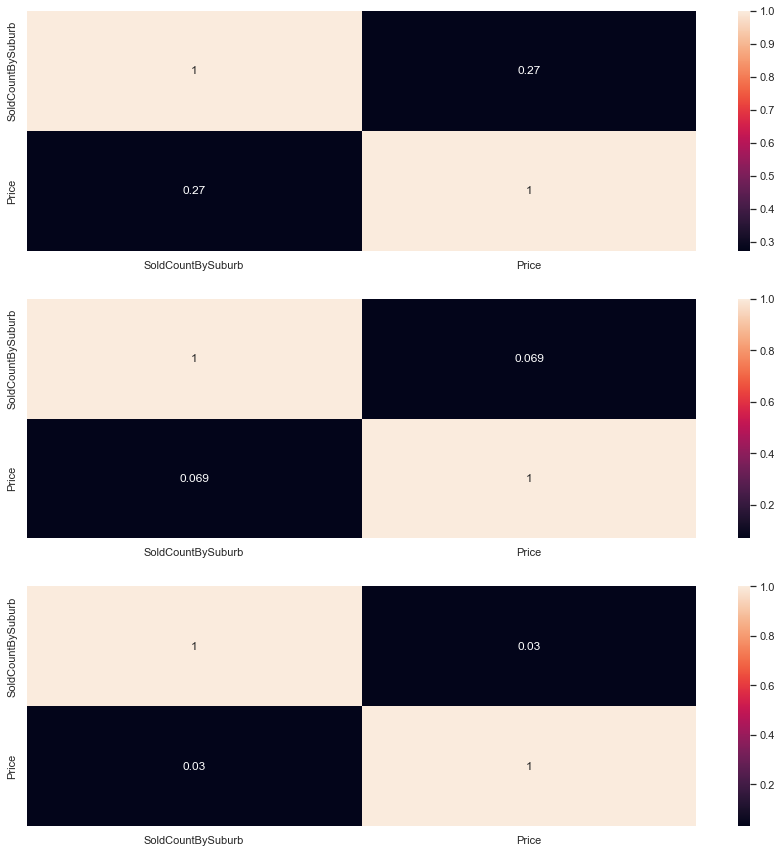

In [18]:
# Number of Property Sold Sum by Suburb & Median Price Corr
fig,ax = plt.subplots(figsize=(15,15))
plt.subplot(3,1,1)
PSdhouseCorr = pd.DataFrame.corr(PSd[PSd['Type']=='h'])
sns.heatmap(PSdhouseCorr,annot=True)
plt.subplot(3,1,2)
PSdtownhouseCorr = pd.DataFrame.corr(PSd[PSd['Type']=='t'])
sns.heatmap(PSdtownhouseCorr,annot=True)
plt.subplot(3,1,3)
PSdunitCorr = pd.DataFrame.corr(PSd[PSd['Type']=='u'])
sns.heatmap(PSdunitCorr,annot=True)
plt.show()

## Output : Property sold number doest not impact the house price

## Pay a closer look into the suburbs which the sold number is above the mean

Mean of house sold number in different suburbs 30.18849840255591


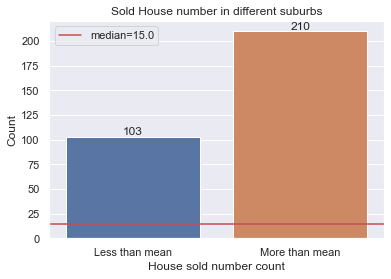

In [19]:
HouseSoldMean = PSd[PSd['Type']=='h']['SoldCountBySuburb'].mean()
print('Mean of house sold number in different suburbs',HouseSoldMean)
less_property = PSd[(PSd['Type']=='h')&(PSd['SoldCountBySuburb']>=HouseSoldMean)].shape[0]
more_property = PSd[(PSd['Type']=='h')&(PSd['SoldCountBySuburb']<=HouseSoldMean)].shape[0]
procount = pd.DataFrame({'Property':['Less than mean','More than mean'],'Count':[less_property,more_property]})
ax = sns.barplot(y=procount["Count"],x=procount["Property"])
plt.title('Sold House number in different suburbs')
plt.xlabel('House sold number count')
plt.ylabel('Count')
HouseSoldMedian = PSd[PSd['Type']=='h']['SoldCountBySuburb'].median()
ax.axhline(HouseSoldMedian,c="r",label='median='+str(HouseSoldMedian))
plt.legend()
# show the number on bars
for container in ax.containers:
    ax.bar_label(container)
plt.show()

## Output: The mean number of sold house grouped by suburbs is much higher than median number sold house (15)
## which means the property sales number depends heavily on suburbs.

## Dig in: Will suburb impact the house price in top 5 sold suburb?

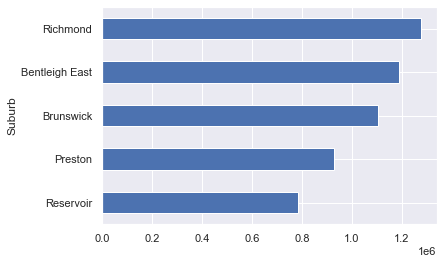

In [28]:
TopSub = PSd['Suburb'].tolist()[:5]
HousePricedf = df[(df['Type']=='h')&(df['Suburb'].isin(TopSub))]
HousePricedfGb = HousePricedf.groupby('Suburb').Price.agg('median').sort_values().plot.barh()
plt.show()

## Output: The suburb will impact the house price.

## Dig in :How room number impact the price in top 5 sold house suburbs ?

In [111]:
##
TopSub = PSd['Suburb'].tolist()[:5]
# HouseSubList = HouseSub['Suburb'].tolist()
HouseNewdf = df[(df['Type']=='h')&(df['Suburb'].isin(TopSub))]
HouseNewdfGb = HouseNewdf.groupby(['Suburb','Rooms']).Price.agg('median').to_frame().reset_index()
HouseNewdfGb

,Suburb,Rooms,Price
0,Bentleigh East,2,1010000.00
1,Bentleigh East,3,1127500.00
2,Bentleigh East,4,1320000.00
3,Bentleigh East,5,1475000.00
4,Brunswick,1,786000.00
5,Brunswick,2,877500.00
6,Brunswick,3,1160000.00
7,Brunswick,4,1500000.00
8,Brunswick,5,1947500.00
9,Preston,1,830000.00


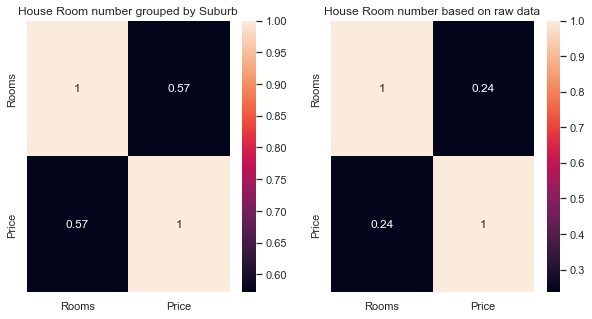

In [134]:
# Will col rooms impact house price
fig, ax = plt.subplots(figsize=(10, 5))
plt.subplot(1,2,1)
HouseNewdfCorr = pd.DataFrame.corr(HouseNewdfGb)
sns.heatmap(HouseNewdfCorr,annot=True)
plt.title('House Room number grouped by Suburb')
plt.subplot(1,2,2)
OrginalHouse = df[df['Type']=='h']
OrginalHouseGb = OrginalHouse.groupby(['Rooms']).Price.agg('median').to_frame().reset_index()
OriginalHouseCorr = pd.DataFrame.corr(OrginalHouseGb)
sns.heatmap(OriginalHouseCorr,annot=True)
plt.title('House Room number based on raw data')
plt.show() # 0.5-0.7 moderately correlated

# Output: The room number is moderately correlated to house price which means room number will have impacts on house price.

# Will Sold Date impact house price ?

In [181]:
# Sold date with Price
SoldTime = df.groupby(['Date','Type']).Price.agg('median').to_frame().reset_index()
SoldTime['Date']=pd.to_datetime(SoldTime["Date"])
SoldTime =SoldTime.sort_values(by='Date')
SoldTime['Season'] = SoldTime['Date'].dt.quarter
SoldTime

,Date,Type,Price,Season
112,2016-01-28,u,813000.00,1
111,2016-01-28,h,1205000.00,1
130,2016-03-09,u,581000.00,1
129,2016-03-09,t,835000.00,1
128,2016-03-09,h,1182500.00,1
...,...,...,...,...
13,2017-11-03,t,659000.00,4
12,2017-11-03,h,1135000.00,4
20,2017-12-08,u,625000.00,4
19,2017-12-08,t,939000.00,4


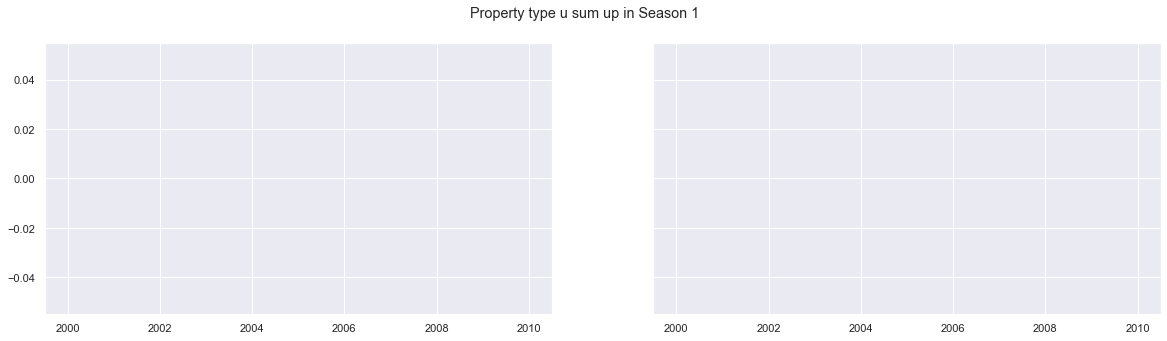

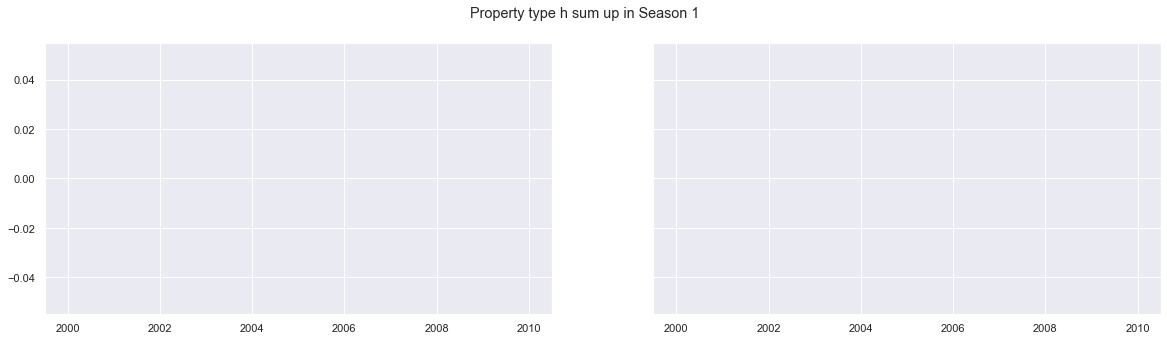

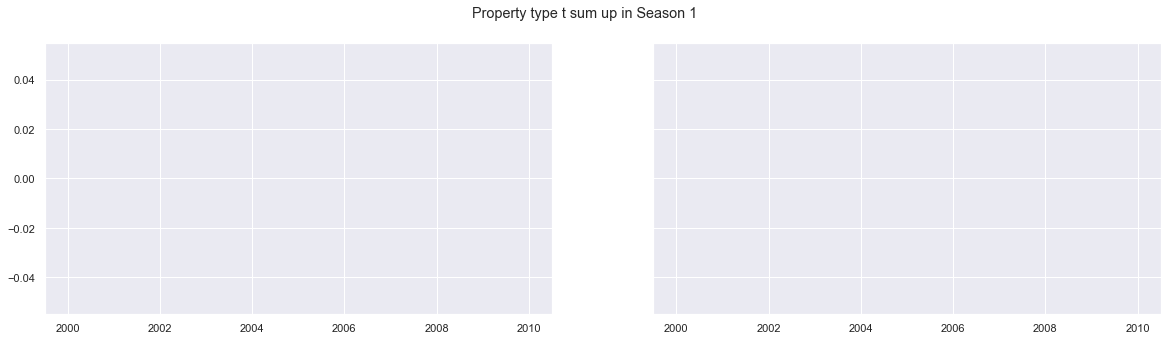

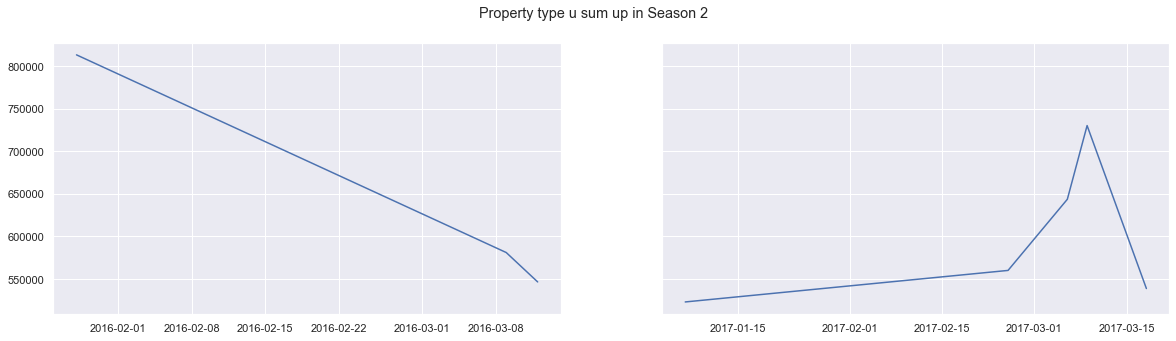

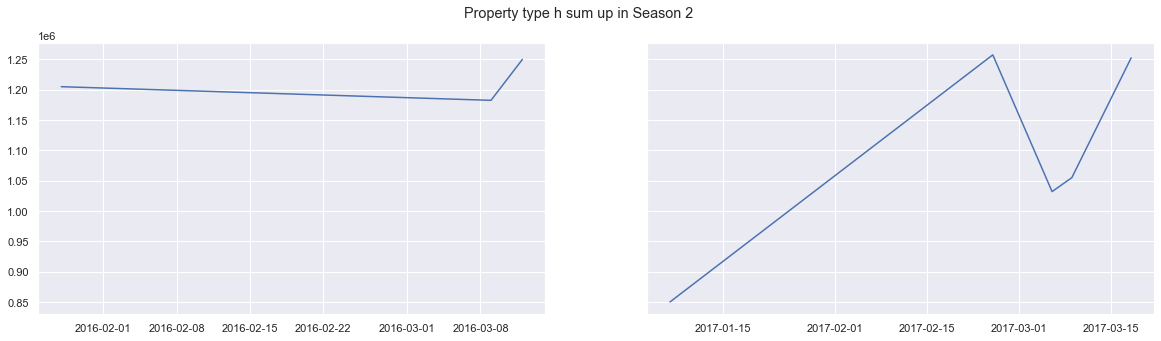

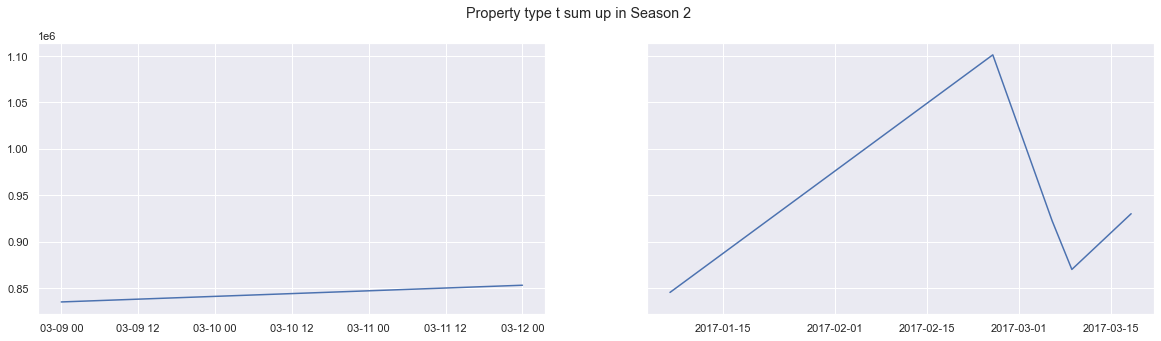

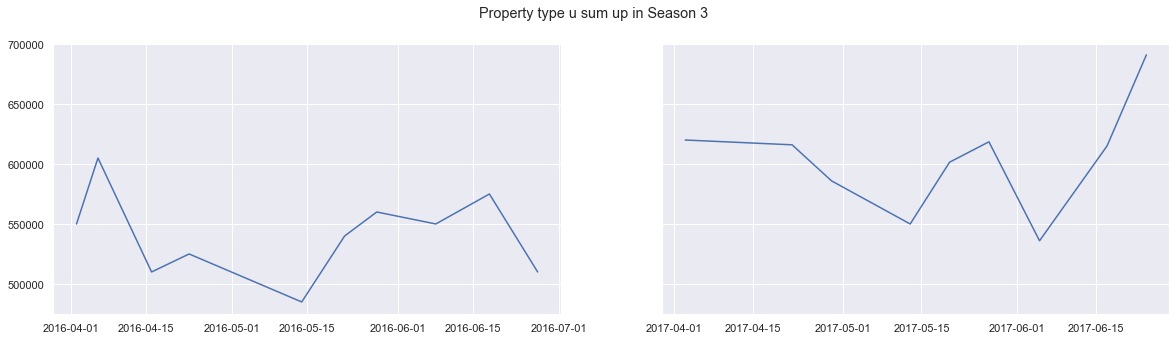

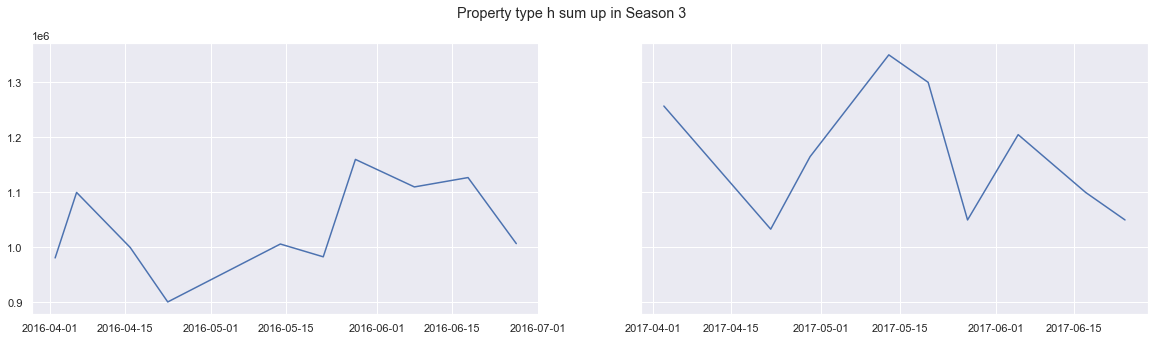

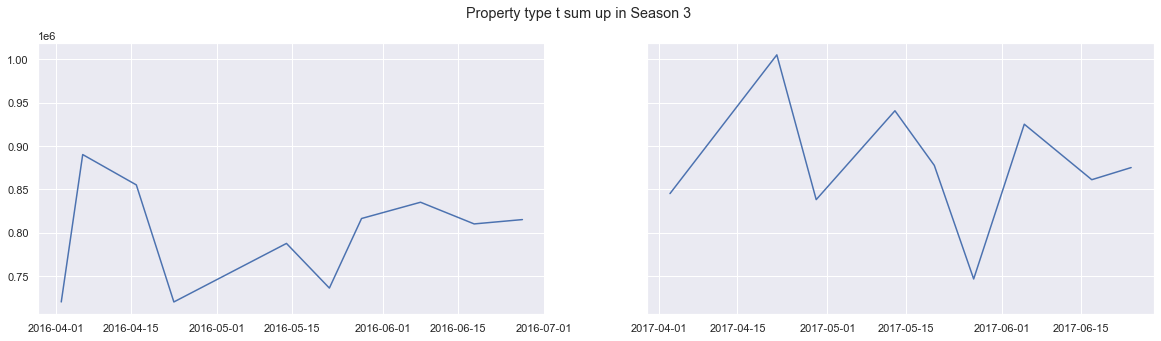

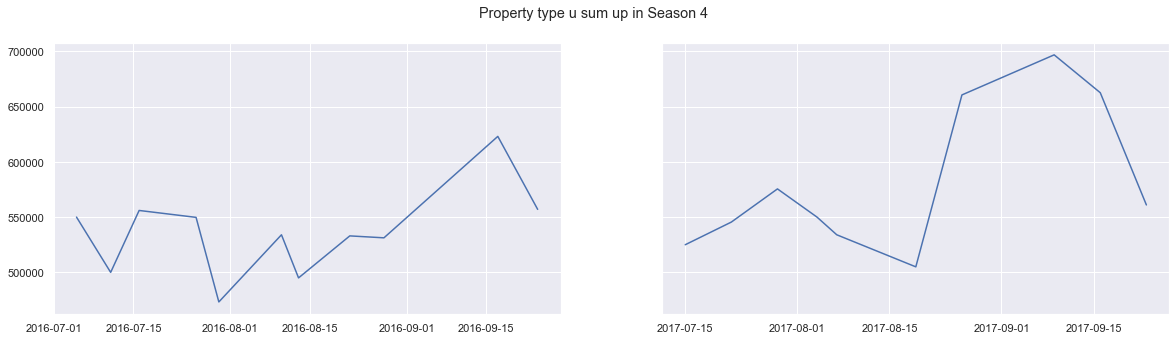

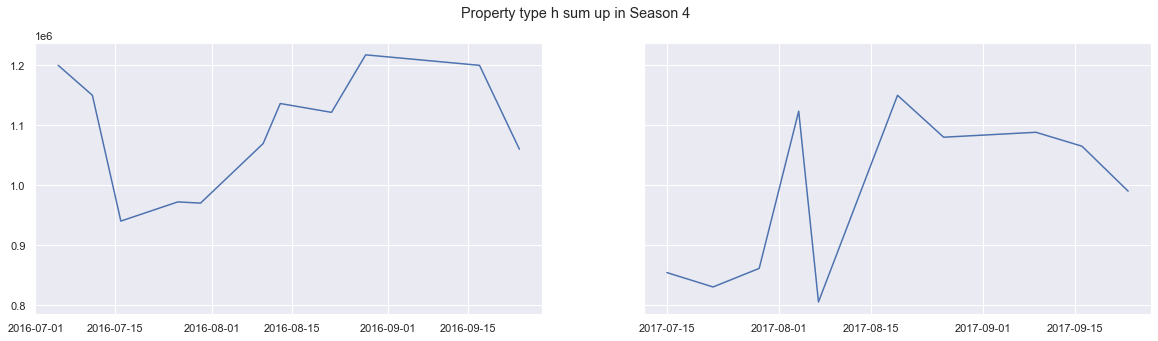

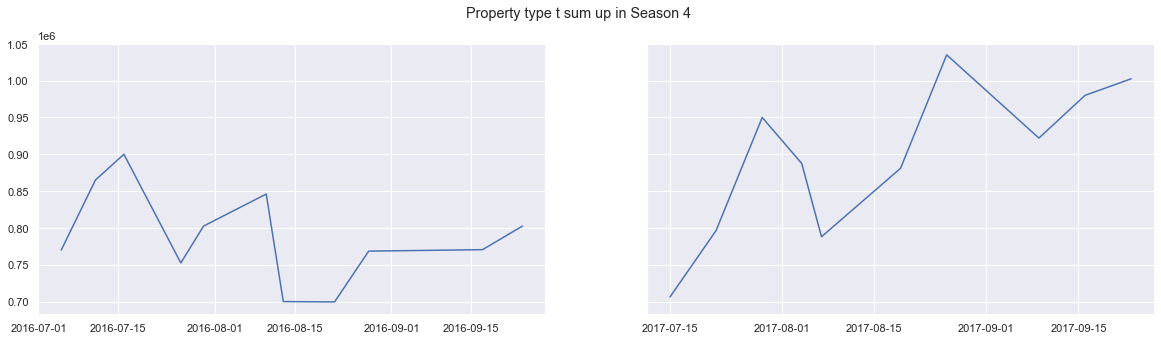

In [188]:
for i in range(4):
    for j in SoldTime.Type.unique():
        fig,axs = plt.subplots(1,2,figsize=(20,5),sharey='all')
        SeasonDf2016 = SoldTime[(SoldTime['Season']==i)&(SoldTime['Type']==j)&(SoldTime['Date'].dt.year==2016)]
        SeasonDf2017 = SoldTime[(SoldTime['Season']==i)&(SoldTime['Type']==j)&(SoldTime['Date'].dt.year==2017)]
        #plt.subplot(1,2,1)
        axs[0].plot(SeasonDf2016.Date,SeasonDf2016.Price)
        #plt.subplot(1,2,2)
        axs[1].plot(SeasonDf2017.Date,SeasonDf2017.Price)
        plt.suptitle("Property type "+str(j) + " sum up in "+"Season "+str(i+1))
        plt.show()

## Output: Sold date has no impact on house price and the data in first season of each type property may have errors like data is missing for the first quartor.

5. Will Sale method imapct the price ? 
S - property sold
SP - property sold prior
PI - property passed in
VB - vendor bid
SA - sold after auction

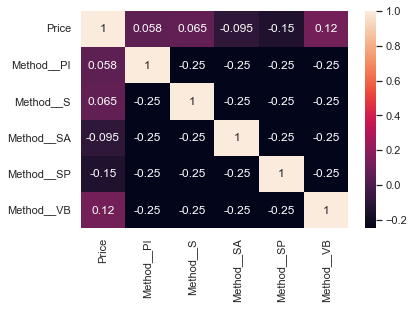

In [214]:
## Method impact the price
Method = df.groupby(['Type','Method']).Price.agg('median')
Method = Method.reset_index()

# Onehot encoder
GetDummies = pd.get_dummies(Method['Method'], prefix='Method_')
Method = pd.concat([Method,GetDummies],axis=1)
MethodCorr = pd.DataFrame.corr(Method)
sns.heatmap(MethodCorr,annot=True)
plt.show()

## Output: Method has no impact on property price for all the type of property

## Will land size impact the prize ?

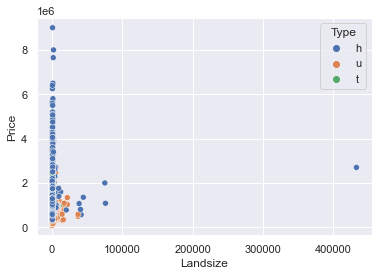

In [24]:
# how land size impact the prize
sns.scatterplot(data=df, x='Landsize', y='Price', hue='Type')
plt.show()

## Output: Cant see the impact on prize.

In [29]:
# check detail of the impact of
# Pivot = pd.pivot_table(df,values='Price',index=['Type','Bathroom','Bedroom2','Car'],aggfunc={'Price':[min,max,np.median]})
# # Sort value by the max price
# Pivot = Pivot.reindex(Pivot.sort_values(by='median', ascending=False).index)
#
# Pivot

## Will the distance between city center and the property impact the price?

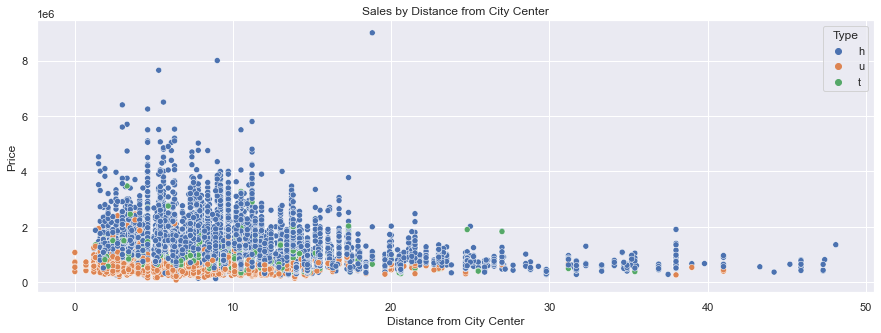

In [30]:
# distance from the city center
plt.figure(figsize=(15,5))
sns.scatterplot(x=df["Distance"],y=df["Price"],hue=df.Type);
plt.title("Sales by Distance from City Center")
plt.xlabel("Distance from City Center")
plt.ylabel("Price")
plt.show()

# Output: Distance impact the property price, the closer to the city the higher the price it is.

In [27]:
# import folium
#
# # Create map and display it
# for i,j in zip(df['Lattitude'], df['Longtitude']):
#     Melb_map = folium.Map(location=[i,j], zoom_start=12)
#
# AddPrice= folium.map.FeatureGroup()
# # add pop-up text to each marker on the map
# latitudes = list(df.Lattitude)
# longitudes = list(df.Longtitude)
# labels = list(df.Type)
#
# for lat, lng, label in zip(latitudes, longitudes, labels):
#     folium.Marker([lat, lng], popup=label).add_to(Melb_map)
#
# # add incidents to map
# Melb_map.add_child(AddPrice)
#
# # Display the map of Melb
# Melb_map


In [219]:
## 指定地区不显示
# import json
# import geojson
# with open('suburb-10-vic.geojson') as f:
#     gj = geojson.load(f)
#
#
# import plotly.express as px
#
# fig = px.choropleth_mapbox(df, geojson=gj, locations='Suburb', color='Price',
#                            color_continuous_scale="Viridis",
#                            featureidkey=,
#                            range_color=(0, 12),
#                            mapbox_style="carto-positron",
#                            zoom=3,
#                            opacity=0.5,
#                            labels={'unemp':'Price'}
#                           )
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# fig.show()